### Load data

In [1]:
import common
import pandas as pd
common.load_clts()
data_df, lects_df = common.load_lexirumah()
display(data_df.head())
display(lects_df.head())




Loading data...
Loaded data.


,ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment,Source
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10]
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10]
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10]
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10]
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10]


,ID,Name,Family,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment,Macroarea
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,"[p/general, p/abui1241-petle]",None,Papunesia
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,"[p/general, p/abui1241-takal]",None,Papunesia
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,"[p/general, p/abui1241-ulaga]",None,Papunesia
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.2109,124.4272,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,"[p/general, p/adan1251-lawah]",None,Papunesia


### Select and combine data

In [2]:
#lects_df = lects_df[["ID", "Name", "Family", "Region", "Latitude", "Longitude"]]
# Filter out proto-languages
lects_df = lects_df[~lects_df["Name"].str.startswith("proto-")]
lects_alorese = lects_df[lects_df["Name"].str.startswith("Alorese")]
# Four Western Lamaholot languages close to Alorese
#lects_lamaholot_related = lects_df[lects_df["Name"].str.contains(
#    "Lamalera|Lewotobi|Lewoingu|Lewolema", case=False, regex=True)]
lects_western_lamaholot = lects_df[lects_df["Iso"].isin(["adr", "lmr", "slp", "ila", "lwt"])]
# Flores-Lembata family, but with preceding WL varieties excluded (and Alorese excluded)
lects_flores_lembata = lects_df[(lects_df["ID"].str.startswith("lama") | lects_df["ID"].str.startswith("sika") | lects_df["ID"].str.startswith("keda")) & ~lects_df.index.isin(lects_western_lamaholot.index)]
# Timor-Alor-Pantar languages, but only Alor-Pantar languages, spoken adjacent to Alorese
lects_alor_pantar = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & lects_df["Region"].str.contains("Alor|Pantar", case=False, regex=True)]
# Other Timor-Alor-Pantor languages, spoken on Timor (and small island Kisar)
lects_timor = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & ~lects_df.index.isin(lects_alor_pantar.index)]
lects_selected_df = pd.concat([lects_alorese, lects_western_lamaholot, lects_flores_lembata, lects_alor_pantar, lects_timor])

# Join data with lect name from lects table
# This order (first select lects, then merge) fastest
data_langs_df = data_df[data_df["Lect_ID"].isin(lects_selected_df["ID"])]
data_langs_df = data_langs_df.rename(columns={"ID":"Form_ID"})
data_merged_df = data_langs_df.merge(lects_df, how="left", left_on="Lect_ID", right_on="ID")
data_merged_df = data_merged_df.drop("ID", axis=1)
display(data_merged_df.head())


,Form_ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment_x,Source,Name,...,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment_y,Macroarea
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia


### Compute phoneme distributions & compute feature matrix per language

In [3]:
#display(data_merged_df[data_merged_df["Lect_ID"]=="alor1247-baran"])
CHARACTER_SEGMENTATION = False
if CHARACTER_SEGMENTATION:
    # perform per-character segmentation
    data_merged_df["Segments_char"] = data_merged_df["Form"].apply(list) # lambda x : [el for el in x if el!="_"]
    segments_col = "Segments_char"
    display(data_merged_df[["Segments", "Segments_char"]].sample(n=50, random_state=24))
else:
    # Use segmentation from dataset (clustering some combinations together)
    segments_col = "Segments_norm"
    data_merged_df["Segments_norm"] = data_merged_df["Segments"].apply(lambda x : common.normalize_list(x, method="soundclass", soundclass_system="asjp"))
    display(data_merged_df[["Segments", "Segments_norm"]].sample(n=50, random_state=24))

data_grouped_lang = data_merged_df.groupby("Lect_ID")
data_agg = data_grouped_lang.aggregate({segments_col:list, "Name": "first", "Family": "first", "Latitude": "first", "Longitude":"first"})
# data_agg["phone_prob"] = data_agg[segments_col].apply(common.phone_prob)
# data_agg["biphone_prob"] = data_agg[segments_col].apply(common.biphone_prob)
# data_agg["phone_prob_existence"] = data_agg[segments_col].apply(common.phone_prob_existence)
# data_agg["biphone_prob_existence"] = data_agg[segments_col].apply(common.biphone_prob_existence)
# display(data_agg.head())

# Effect now is:
# -1 for available biphone,
# -None for combination not available, None for combination and both constitutents not available
# => None replaced by 0
# What Macklin-Cordes does:
# - 1 for available biphone
# - 0 for combination not available, if constituents are available
# - None for combination not available, if constituents not available
phone_prob_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob, "phone_prob")
phone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_existence, "phone_prob_existence")
biphone_prob_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob, "biphone_prob")
biphone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob_existence, "biphone_prob_existence")

phone_prob_boundaries_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_boundaries, "phone_prob_boundaries")
biphone_transition_matrix = common.create_biphone_transition_matrix(biphone_prob_matrix, phone_prob_boundaries_matrix)

display(phone_prob_matrix.head())
display(phone_prob_existence_matrix.head())
display(biphone_prob_matrix.head())
display(biphone_prob_existence_matrix.head())
display(biphone_transition_matrix.head())


,Segments,Segments_norm
12220,"[b, aː, t, _, t, a, f, e]","[b, a, t, t, a, f, e]"
29386,"[p, u, l, u, _, ʋ, o, t, _, t, ə, l, u]","[p, u, l, u, w, o, t, t, I, l, u]"
26412,"[n, a, ʔ, ɪ, r, o, b, a]","[n, a, 7, i, r, o, b, a]"
10544,"[s, a, j, u, r, a]","[s, a, y, u, r, a]"
8206,"[h, i, n, ɑ, l]","[h, i, n, o, l]"
8809,"[ʔ, i, k, ɑ, n]","[7, i, k, o, n]"
41468,"[k, a, nː, a, k, u, ŋ]","[k, a, n, a, k, u, N]"
6263,"[o, s, o, ŋ]","[o, s, o, N]"
33828,"[a, m, i, n, a]","[a, m, i, n, a]"
2455,"[k, a, f, e]","[k, a, f, e]"


,q,H,x,r,7,u,s,N,T,j,...,G,g,i,h,d,y,C,m,k,l
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,0.0250768,NaN,0.0731832,0.0148414,0.0373593,NaN,NaN,...,NaN,NaN,0.113613,0.0230297,0.0143296,0.0174002,NaN,0.0255885,0.0849539,0.0481064
abui1241-papun,NaN,NaN,NaN,0.032207,0.00211193,0.0770855,0.0353749,0.032207,NaN,NaN,...,NaN,0.032735,0.154699,NaN,0.0137276,0.0200634,NaN,0.0295671,0.0744456,0.0364308
abui1241-petle,NaN,NaN,NaN,0.0205339,NaN,0.0616016,0.0143737,0.0554415,NaN,NaN,...,NaN,0.00205339,0.112936,0.0184805,0.00821355,0.0287474,NaN,0.0451745,0.0677618,0.0882957
abui1241-takal,0.0359949,0.000253485,NaN,0.0294043,0.00101394,0.0544994,0.0108999,0.0377693,NaN,NaN,...,NaN,0.000253485,0.0889734,0.0385298,0.0157161,0.0273764,NaN,0.0375158,0.0405577,0.0567807
abui1241-ulaga,0.000773196,0.000257732,0.0224227,0.0342784,0.000257732,0.0530928,0.0167526,0.0402062,NaN,NaN,...,NaN,0.0159794,0.107216,0.000257732,0.0265464,0.00463918,NaN,0.0309278,0.0649485,0.0528351


,q,H,x,r,7,u,s,N,T,j,...,G,g,i,h,d,y,C,m,k,l
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,1,NaN,1,1,1,NaN,NaN,...,NaN,NaN,1,1,1,1,NaN,1,1,1
abui1241-papun,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,...,NaN,1,1,NaN,1,1,NaN,1,1,1
abui1241-petle,NaN,NaN,NaN,1,NaN,1,1,1,NaN,NaN,...,NaN,1,1,1,1,1,NaN,1,1,1
abui1241-takal,1,1,NaN,1,1,1,1,1,NaN,NaN,...,NaN,1,1,1,1,1,NaN,1,1,1
abui1241-ulaga,1,1,1,1,1,1,1,1,NaN,NaN,...,NaN,1,1,1,1,1,NaN,1,1,1


,o,e,r,o,e,u,v,o,y,N,...,+,E,t,G,q,a,🡄,r,i,q
,k,G,i,t,i,i,w,s,e,+,...,n,🡆,r,q,m,C,k,e,x,I
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.0108413,NaN,0.00433651,NaN,0.00867303,0.00477016,NaN,NaN,0.00390286,NaN,...,0.000433651,NaN,NaN,NaN,NaN,NaN,0.0156114,0.00303556,NaN,NaN
abui1241-papun,0.0187166,NaN,0.00490196,0.0147059,NaN,0.00579323,NaN,0.00490196,0.000891266,NaN,...,NaN,0.00490196,NaN,NaN,NaN,NaN,0.0138146,0.000445633,NaN,NaN
abui1241-petle,0.010101,NaN,NaN,NaN,0.00841751,0.0016835,NaN,NaN,0.0117845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0117845,NaN,NaN,NaN
abui1241-takal,0.00218723,NaN,0.00328084,0.00109361,0.00853018,0.00371829,NaN,0.000218723,0.00765529,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.014217,0.0019685,NaN,NaN
abui1241-ulaga,0.00678485,NaN,0.00459619,0.00218866,0.0102867,0.0026264,NaN,0.00109433,0.000656599,NaN,...,NaN,0.000656599,NaN,NaN,NaN,NaN,0.0151018,0.00306413,0.00175093,NaN


,o,e,r,o,e,u,v,o,y,N,...,+,E,t,G,q,a,🡄,r,i,q
,k,G,i,t,i,i,w,s,e,+,...,n,🡆,r,q,m,C,k,e,x,I
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,1,NaN,1,NaN,1,1,NaN,NaN,1,NaN,...,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
abui1241-papun,1,NaN,1,1,NaN,1,NaN,1,1,NaN,...,NaN,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN
abui1241-petle,1,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
abui1241-takal,1,NaN,1,1,1,1,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
abui1241-ulaga,1,NaN,1,1,1,1,NaN,1,1,NaN,...,NaN,1,NaN,NaN,NaN,NaN,1,1,1,NaN


,o,e,r,o,e,u,v,o,y,N,...,🔙+,🔙E,🔙t,🔙G,🔙q,🔙a,🔙🡄,🔙r,🔙i,🔙q
,k,G,i,t,i,i,w,s,e,+,...,🔙n,🔙🡆,🔙r,🔙q,🔙m,🔙C,🔙k,🔙e,🔙x,🔙I
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.405861,NaN,0.235234,NaN,0.150673,0.088665,NaN,NaN,0.305112,NaN,...,0.0209572,NaN,NaN,NaN,NaN,NaN,0.249971,0.0527354,NaN,NaN
abui1241-papun,0.129815,NaN,0.208454,0.101997,NaN,0.102929,NaN,0.0339992,0.0608406,NaN,...,NaN,0.0363305,NaN,NaN,NaN,NaN,0.25415,0.105088,NaN,NaN
abui1241-petle,0.372674,NaN,NaN,NaN,0.203471,0.0393378,NaN,NaN,0.590067,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.250332,NaN,NaN,NaN
abui1241-takal,0.0668905,NaN,0.147044,0.0334453,0.157264,0.0899133,NaN,0.00668905,0.368517,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.461963,0.0362917,NaN,NaN
abui1241-ulaga,0.208624,NaN,0.181705,0.0672982,0.19317,0.0670368,NaN,0.0336491,0.1918,NaN,...,NaN,0.00501074,NaN,NaN,NaN,NaN,0.3151,0.0575399,0.105821,NaN


### Perform dimensionality reduction

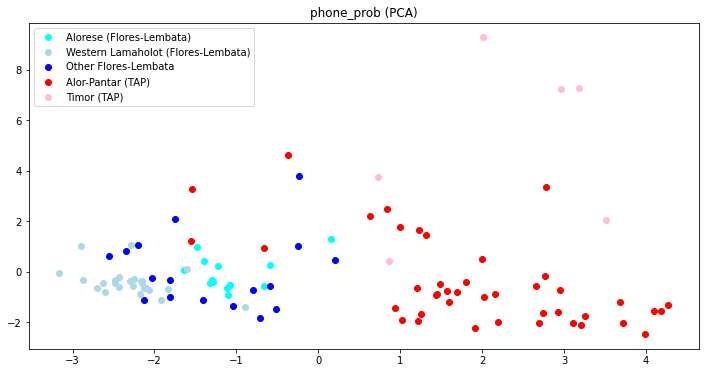

Loadings positive x:


i    0.335528
s    0.297342
y    0.249296
q    0.240055
x    0.213716
t    0.196000
g    0.172875
a    0.129523
z    0.120807
G    0.116963
Name: PC1, dtype: float64

Loadings negative x:


p   -0.372672
I   -0.352717
h   -0.220399
k   -0.206095
H   -0.162474
u   -0.152291
e   -0.112917
w   -0.108072
o   -0.104787
7   -0.099620
Name: PC1, dtype: float64

Loadings positive y:


E    0.413682
o    0.326210
z    0.293012
l    0.251466
Z    0.235049
7    0.234021
h    0.186973
g    0.142689
n    0.114550
C    0.108653
Name: PC2, dtype: float64

Loadings negative y:


a   -0.296024
e   -0.258561
m   -0.178629
d   -0.158973
k   -0.158785
r   -0.154423
x   -0.146011
q   -0.145785
w   -0.137439
y   -0.134602
Name: PC2, dtype: float64

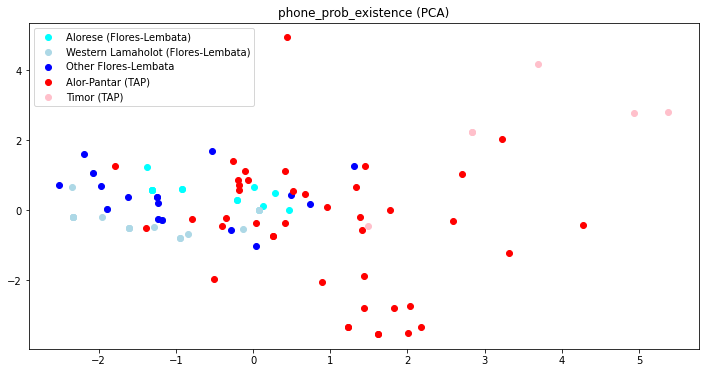

Loadings positive x:


v    0.341920
+    0.333947
z    0.329838
y    0.323090
C    0.295597
E    0.294165
q    0.233976
G    0.226357
x    0.219808
f    0.184401
Name: PC1, dtype: float64

Loadings negative x:


I   -2.236509e-01
H   -1.694520e-01
N   -1.677925e-01
g   -5.593534e-02
e   -4.494223e-02
r   -1.110223e-16
p   -1.033976e-25
b    0.000000e+00
n    0.000000e+00
t    0.000000e+00
Name: PC1, dtype: float64

Loadings positive y:


z    3.258527e-01
Z    3.102323e-01
E    2.760296e-01
C    2.508395e-01
j    1.329163e-01
T    8.409117e-02
G    7.141084e-02
f    7.685809e-03
g    4.638494e-03
r    5.551115e-17
Name: PC2, dtype: float64

Loadings negative y:


q   -0.474285
x   -0.461636
h   -0.235411
7   -0.235176
+   -0.144195
y   -0.131477
w   -0.099944
H   -0.089474
v   -0.081244
N   -0.080175
Name: PC2, dtype: float64

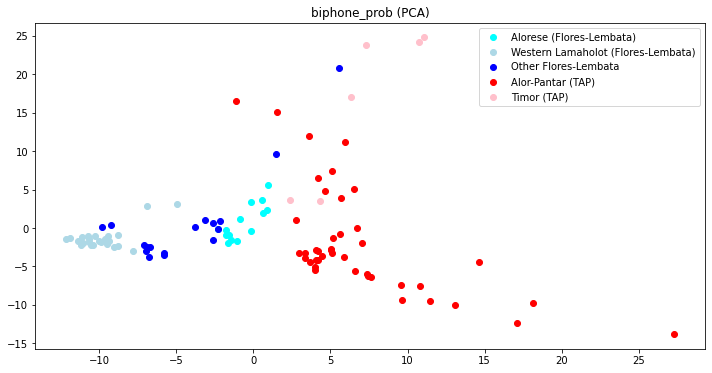

Loadings positive x:


i  b    0.082846
   s    0.080689
a  r    0.075984
q  a    0.075469
r  n    0.075196
l  🡆    0.073679
🡄  y    0.072425
   q    0.072071
a  q    0.072032
s  r    0.069797
Name: PC1, dtype: float64

Loadings negative x:


I  r   -0.101418
   l   -0.099592
b  I   -0.098457
l  I   -0.097774
p  I   -0.096089
e  🡆   -0.094187
r  I   -0.092577
k  I   -0.092347
w  I   -0.090660
I  p   -0.090119
Name: PC1, dtype: float64

Loadings positive y:


E  n    0.124271
   l    0.122138
t  E    0.120934
l  E    0.117205
m  E    0.114109
E  m    0.111903
   p    0.109762
n  E    0.109039
E  t    0.105573
p  E    0.104590
Name: PC2, dtype: float64

Loadings negative y:


r  a   -0.072840
e  t   -0.067634
m  e   -0.065832
w  a   -0.065370
a  t   -0.063759
   w   -0.062762
q  a   -0.062206
m  a   -0.062042
e  l   -0.060841
a  q   -0.060476
Name: PC2, dtype: float64

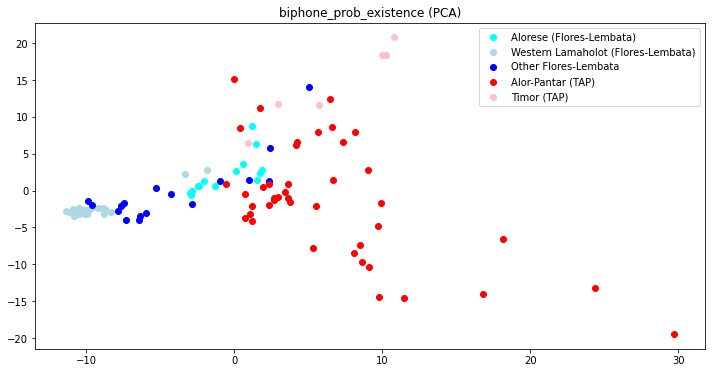

Loadings positive x:


i  b    0.088900
u  p    0.078281
q  🡆    0.075214
   a    0.074906
i  y    0.074778
   s    0.073982
q  u    0.073094
🡄  q    0.073094
a  q    0.073094
q  o    0.073094
Name: PC1, dtype: float64

Loadings negative x:


l  I   -0.090430
🡄  I   -0.089768
I  p   -0.083682
a  o   -0.080815
r  I   -0.079887
I  k   -0.077483
   b   -0.075549
n  I   -0.075502
a  e   -0.075386
I  g   -0.075257
Name: PC1, dtype: float64

Loadings positive y:


7  E    0.107325
E  🡆    0.099712
   m    0.097428
   n    0.097335
t  E    0.095229
E  h    0.095136
r  E    0.094432
E  7    0.092104
l  E    0.092099
🡄  E    0.091088
Name: PC2, dtype: float64

Loadings negative y:


q  o   -0.087537
   u   -0.087537
a  q   -0.087537
🡄  q   -0.087537
q  a   -0.087453
   🡆   -0.085455
   e   -0.078850
r  q   -0.076555
i  q   -0.076459
u  q   -0.075453
Name: PC2, dtype: float64

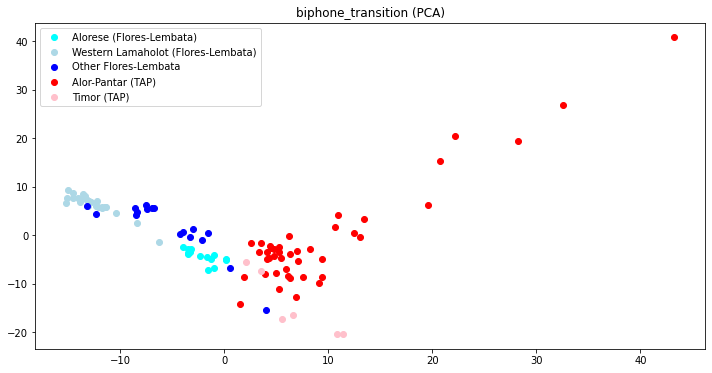

Loadings positive x:


l   🡆     0.064243
🔙q  🔙a    0.063780
o   m     0.063660
🡄   q     0.062152
a   q     0.061032
i   s     0.060948
🔙i  🔙b    0.060555
q   a     0.059715
🡄   y     0.059052
k   i     0.058361
Name: PC1, dtype: float64

Loadings negative x:


o   🡆    -0.069858
a   🡆    -0.069732
🔙I  🔙r   -0.069136
l   I    -0.067534
🔙e  🔙🡆   -0.066134
🔙🡄  🔙r   -0.065578
e   🡆    -0.065330
b   I    -0.063806
k   I    -0.063752
i   p    -0.063106
Name: PC1, dtype: float64

Loadings positive y:


🔙q  🔙a    0.066175
🔙🡄  🔙p    0.066147
🡄   q     0.065985
🔙r  🔙a    0.065971
I   f     0.065083
t   q     0.064543
🔙w  🔙u    0.063342
s   +     0.062073
🔙y  🔙i    0.062049
🔙t  🔙q    0.062035
Name: PC2, dtype: float64

Loadings negative y:


🔙E  🔙n   -0.066323
r   E    -0.064971
t   E    -0.063725
🔙E  🔙l   -0.063590
    🔙m   -0.062622
l   E    -0.062105
m   E    -0.060857
n   E    -0.060851
i   l    -0.060507
🔙E  🔙k   -0.060448
Name: PC2, dtype: float64

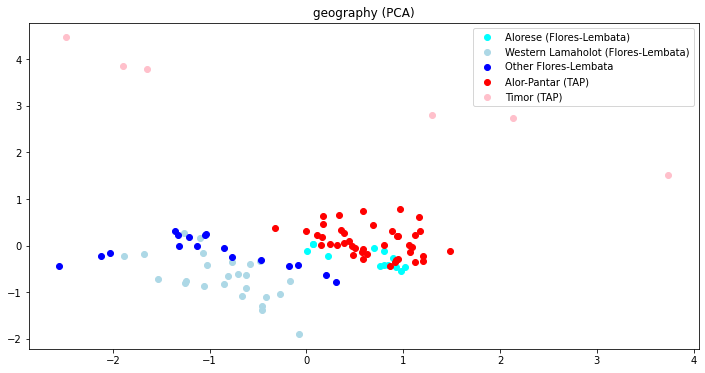

Loadings positive x:


Latitude     0.707107
Longitude    0.707107
Name: PC1, dtype: float64

Loadings negative x:


Longitude    0.707107
Latitude     0.707107
Name: PC1, dtype: float64

Loadings positive y:


Longitude    0.707107
Latitude    -0.707107
Name: PC2, dtype: float64

Loadings negative y:


Latitude    -0.707107
Longitude    0.707107
Name: PC2, dtype: float64

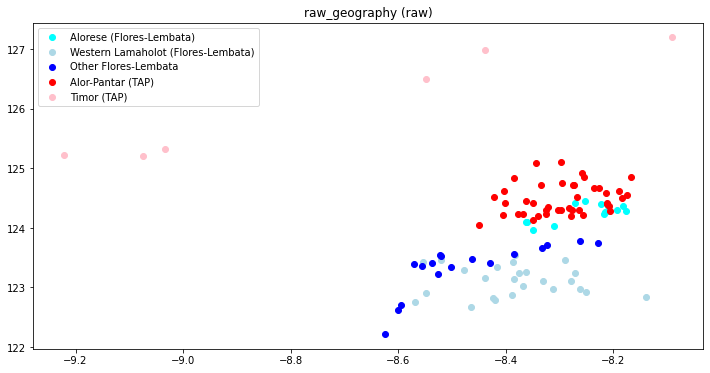

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

PLOT_LABELS = False

# TODO: Biphone prob with transition probabilities

# Define language groups for plots
language_groups = {"Alorese (Flores-Lembata)": {"color": "cyan", "lects": lects_alorese["ID"]},
                   "Western Lamaholot (Flores-Lembata)": {"color": "lightblue", "lects": lects_western_lamaholot["ID"]},
                   "Other Flores-Lembata": {"color": "blue", "lects": lects_flores_lembata["ID"]},
                   "Alor-Pantar (TAP)": {"color": "red", "lects": lects_alor_pantar["ID"]},
                   "Timor (TAP)": {"color": "pink", "lects": lects_timor["ID"]}
                  }

dim_reds_available = {"PCA": PCA(n_components=2)}#,"MDS": MDS()}

analyses = {"phone_prob": phone_prob_matrix,
            "phone_prob_existence": phone_prob_existence_matrix,
            "biphone_prob": biphone_prob_matrix,
            "biphone_prob_existence": biphone_prob_existence_matrix,
            "biphone_transition": biphone_transition_matrix,
            "geography": data_agg[["Latitude", "Longitude"]].fillna(0),
            "raw_geography": ["Latitude", "Longitude"],
            }

for study_label, study_data in analyses.items():
    if study_label == "raw_geography":
        reduce = False
        plot_cols = study_data
        dim_reds = {"raw": plot_cols}
    else:
        reduce = True
        dim_reds = dim_reds_available
    for dr_label, dr in dim_reds.items():
        common.reduce_plot(study_label, study_data, dr_label, dr, data_agg, language_groups, PLOT_LABELS, reduce)
        if dr_label == "PCA":
            loadings_x_pos, loadings_x_neg, loadings_y_pos, loadings_y_neg = common.compute_loadings(dr, study_data.columns)
            print("Loadings positive x:")
            display(loadings_x_pos)
            print("Loadings negative x:")
            display(loadings_x_neg)
            print("Loadings positive y:")
            display(loadings_y_pos)
            print("Loadings negative y:")
            display(loadings_y_neg)
        